In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("calibrated_ILB_scores_with_cluster5.csv")

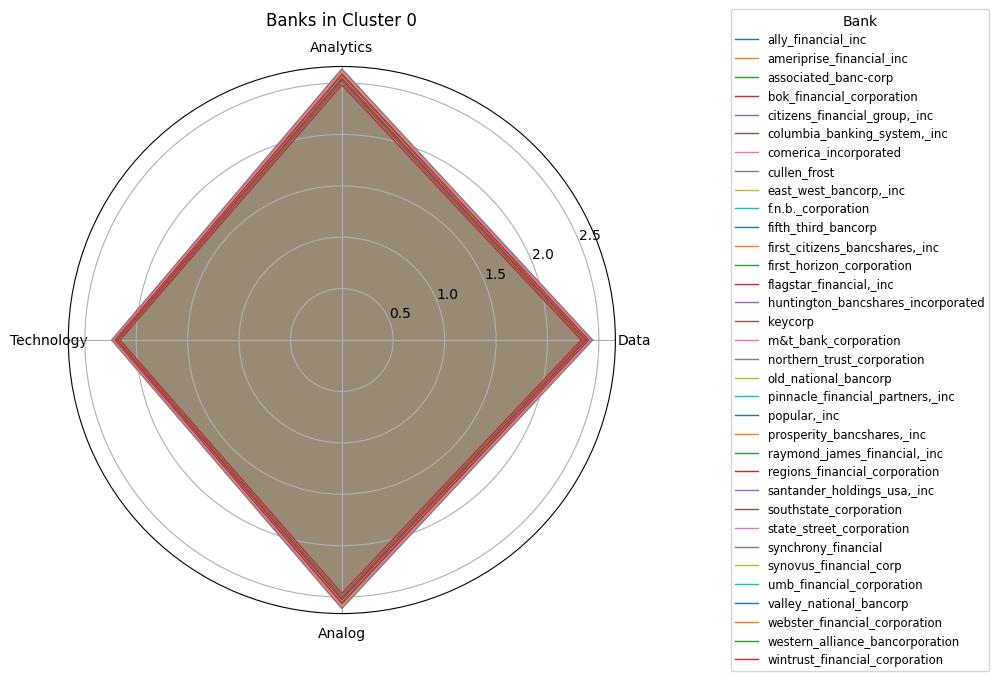

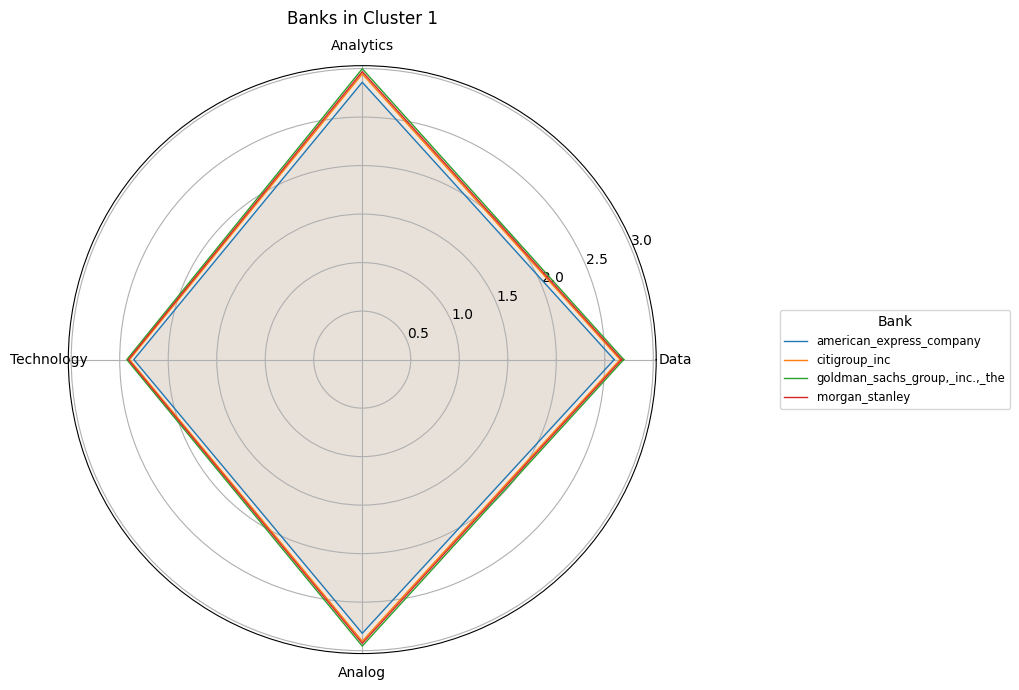

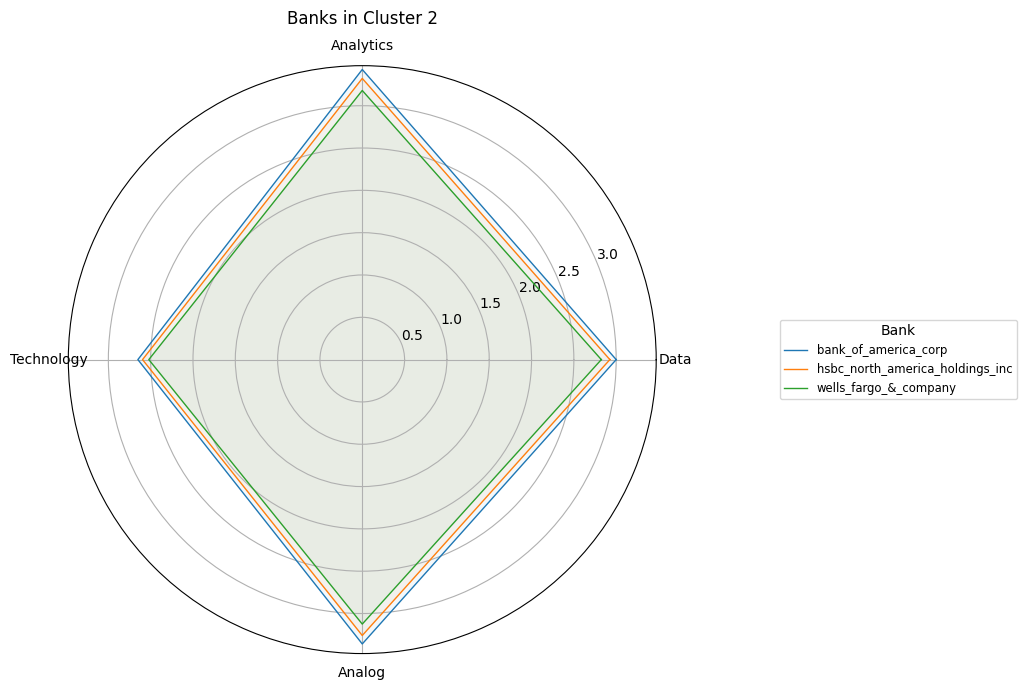

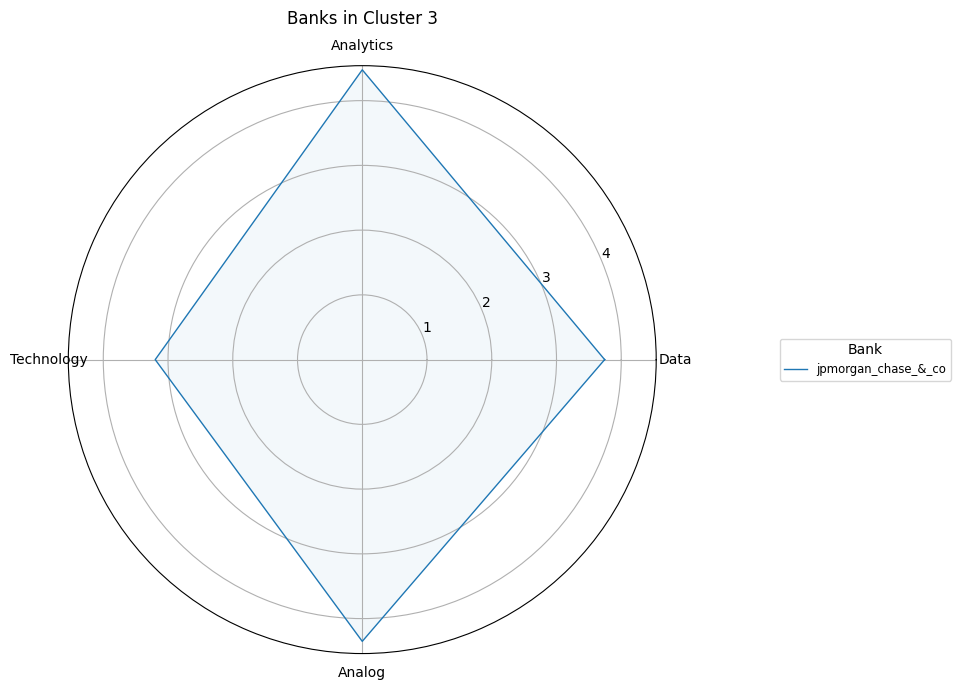

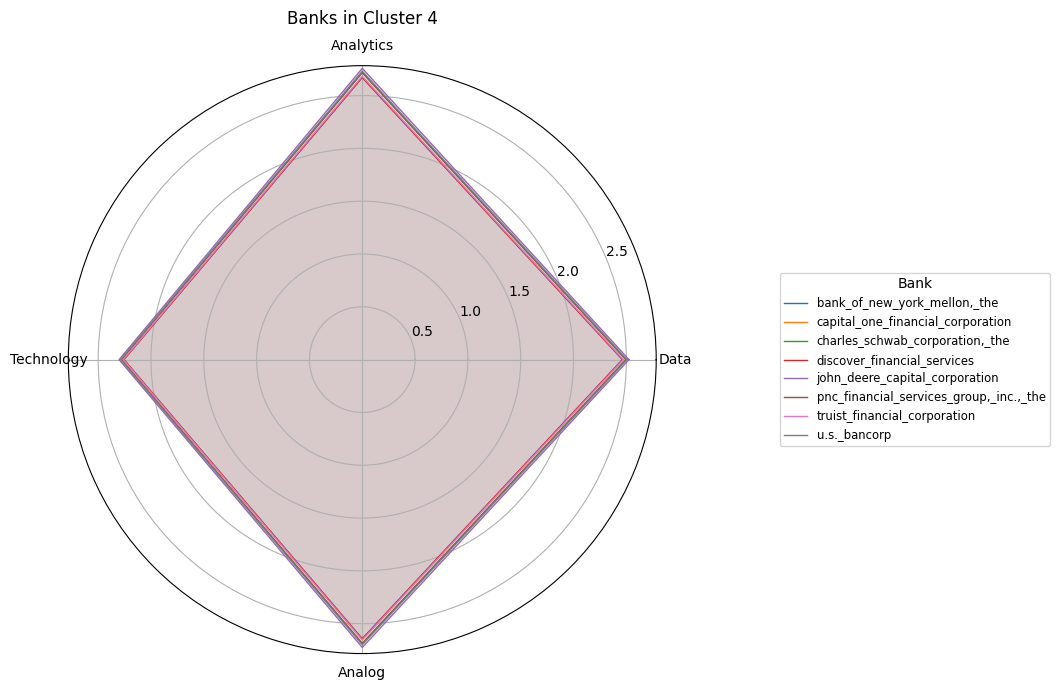

In [ ]:
# Create spider charts of all banks within each cluster for easier comparison in small groups

# Setup for spider charts
categories = ['Data_calibrated_score', 'Analytics_calibrated_score',
              'Technology_calibrated_score', 'Analog_calibrated_score']
N = len(categories)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # close the radar circle

# Plot one radar chart per cluster with individual banks in that cluster
clusters = df['cluster'].unique()
for cluster_id in sorted(clusters):
    cluster_df = df[df['cluster'] == cluster_id]
    plt.figure(figsize=(10, 7))  # wider to fit legend on the side
    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], ['Data', 'Analytics', 'Technology', 'Analog'])

    for _, row in cluster_df.iterrows():
        values = row[categories].tolist()
        values += values[:1]
        ax.plot(angles, values, label=row['bank_name'], linewidth=1)
        ax.fill(angles, values, alpha=0.05)

    plt.title(f'Banks in Cluster {cluster_id}', pad=30)

    # ✅ Move legend outside plot to the right
    plt.legend(
        loc='center left',
        bbox_to_anchor=(1.2, 0.5),
        fontsize='small',
        title='Bank'
    )

    plt.tight_layout()
    plt.show()


In [ ]:
# Define the score columns
score_cols = ['Data_calibrated_score', 'Analytics_calibrated_score',
              'Technology_calibrated_score', 'Analog_calibrated_score']

# Calculate mean scores by cluster
cluster_means = df.groupby('cluster')[score_cols].mean().reset_index()

# Print or export results
print(cluster_means)


   cluster  Data_calibrated_score  Analytics_calibrated_score  \
0        0               2.383126                    2.557790   
1        1               2.655866                    2.942338   
2        2               2.916631                    3.310003   
3        3               3.743641                    4.476042   
4        4               2.486565                    2.703633   

   Technology_calibrated_score  Analog_calibrated_score  
0                     2.197544                 2.536188  
1                     2.398084                 2.900083  
2                     2.589821                 3.248002  
3                     3.197906                 4.351415  
4                     2.273600                 2.674198  


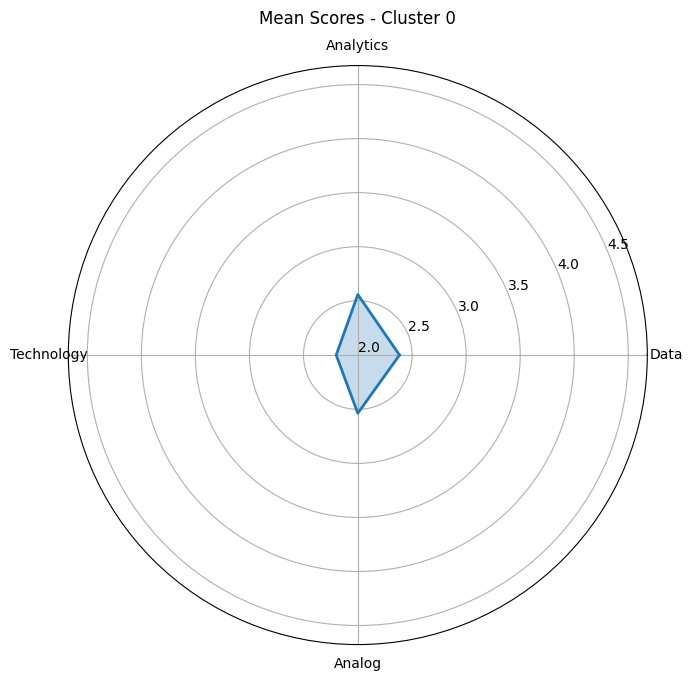

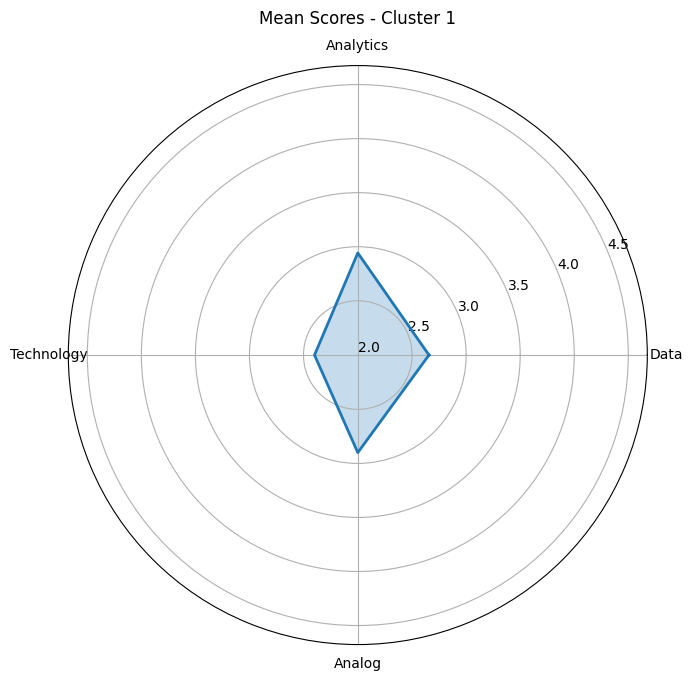

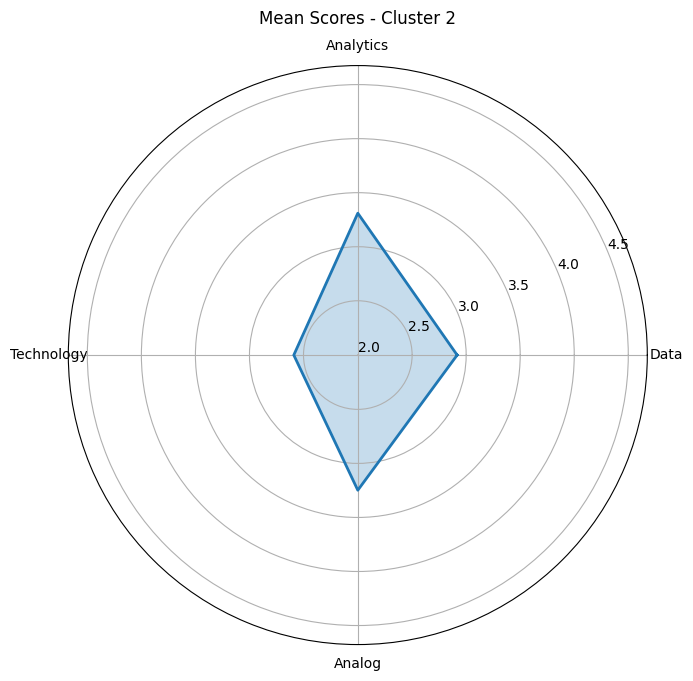

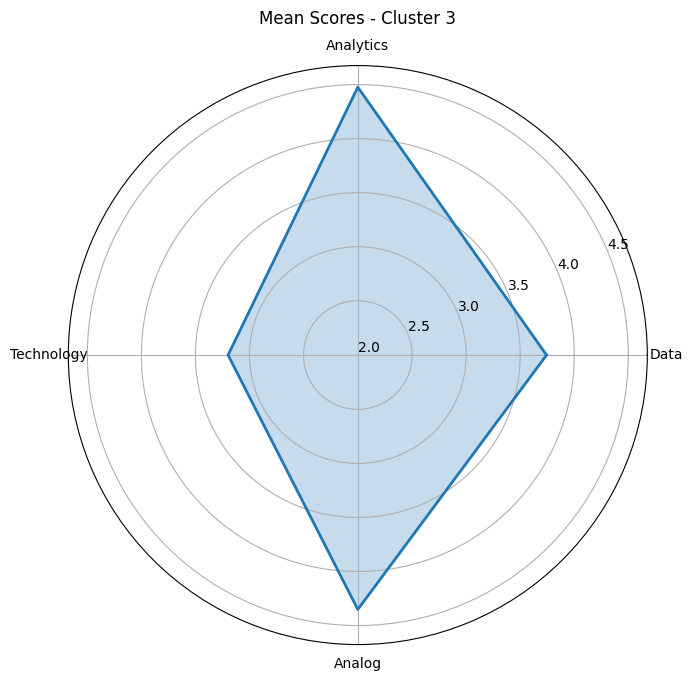

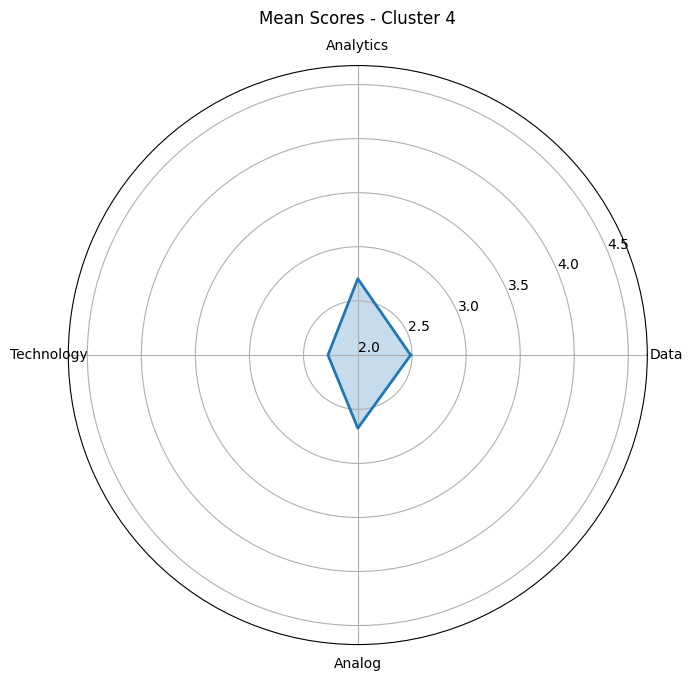

In [ ]:
# Setup for spider charts
categories = ['Data_calibrated_score', 'Analytics_calibrated_score',
              'Technology_calibrated_score', 'Analog_calibrated_score']
N = len(categories)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # close the radar circle

# Get cluster means
cluster_means = df.groupby('cluster')[categories].mean()

# Plot one radar chart per cluster
for cluster_id, row in cluster_means.iterrows():
    plt.figure(figsize=(7, 7))
    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], ['Data', 'Analytics', 'Technology', 'Analog'])

    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, label=f'Cluster {cluster_id}', linewidth=2)
    ax.fill(angles, values, alpha=0.25)

    ax.set_ylim(cluster_means.values.min() - 0.2, cluster_means.values.max() + 0.2)

    plt.title(f'Mean Scores - Cluster {cluster_id}', pad=30)
    plt.tight_layout()
    plt.show()


Scores vs NI

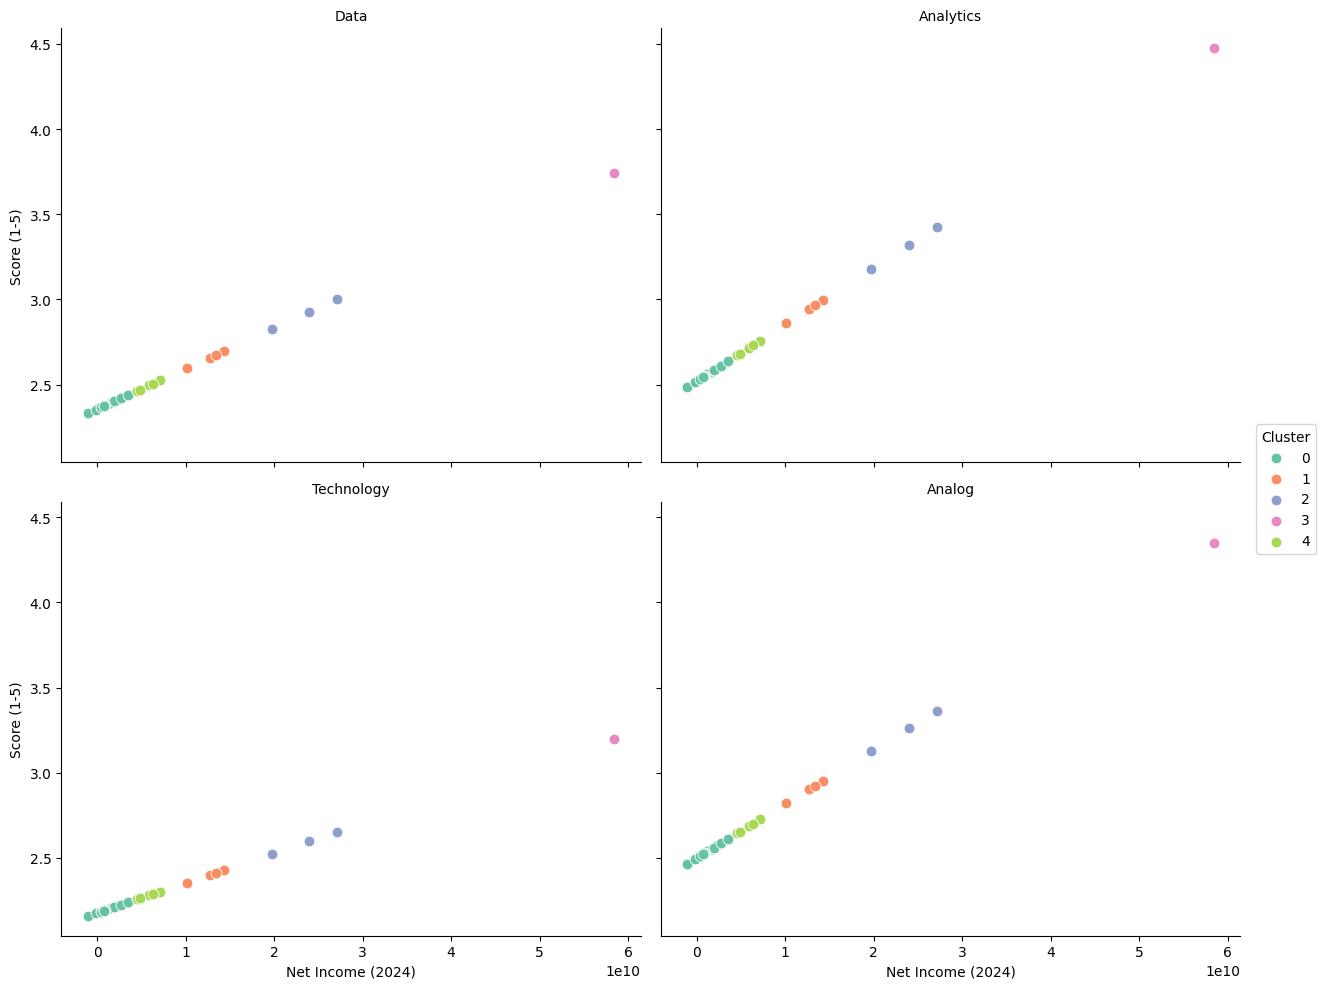

In [ ]:
# Re-import needed modules after environment reset

# Reload uploaded files
scores_df = pd.read_csv("calibrated_ILB_scores_with_cluster5.csv")
income_df = pd.read_csv("bank_net_income_2024.csv")

# Clean income values
income_df['2024 Net Income'] = income_df['2024 Net Income'].replace('[\$,]', '', regex=True).astype(float)

# Merge income into scores dataframe
merged_df = pd.merge(scores_df, income_df, on='bank_name')

# Melt for plotting: 1 row per bank per ILB dimension
melted = pd.melt(merged_df,
                 id_vars=['bank_name', '2024 Net Income', 'cluster'],
                 value_vars=['Data_calibrated_score', 'Analytics_calibrated_score',
                             'Technology_calibrated_score', 'Analog_calibrated_score'],
                 var_name='Dimension', value_name='ILB Score')

# Simplify dimension labels
melted['Dimension'] = melted['Dimension'].str.replace('_calibrated_score', '')

# Plot: ILB Score vs Net Income per Dimension, color by cluster
g = sns.FacetGrid(melted, col="Dimension", col_wrap=2, height=5, aspect=1.2, hue='cluster', palette='Set2')
g.map_dataframe(sns.scatterplot, x='2024 Net Income', y='ILB Score', s=60)
g.add_legend(title='Cluster')
g.set_axis_labels("Net Income (2024)", "Score (1-5)")
g.set_titles("{col_name}")
g._legend.set_bbox_to_anchor((1.05, 0.5))
g._legend.set_frame_on(True)  # optional: adds a border
g._legend.set_title("Cluster")

plt.tight_layout()
plt.show()
